In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 卷烟机

In [2]:
# 导入数据
def import_data(path):
    return pd.read_excel(path)

## 剔除明细

In [3]:
path = 'C:/Users/jing/Desktop/works/北京卷烟厂项目/提供天工资料/卷包数采数据/卷烟机剔除明细_20181207.xls'

df1 = import_data(path)
df1 = df1.iloc[:,:15]
df1.head()

WARNING *** file size (449161) not 512 + multiple of sector size (512)


,生产日期,班时,班次,机台,牌号,汇总,漏气,空头,缺嘴棒,手动剔出,过 轻,过 重,软 点,轻端剔出,硬 点
0,2018-08-13,早班,甲班,卷烟机01#,牡丹(软北京)烟支,4134,231,548,59,2989,203,19,43,42,0
1,2018-08-13,早班,甲班,卷烟机02#,牡丹(软北京)烟支,10983,119,3481,20,3032,114,133,1856,1834,394
2,2018-08-13,早班,甲班,卷烟机04#,中南海(硬酷爽风尚)烟支,5322,127,198,6,2224,244,61,1160,1242,60
3,2018-08-13,早班,甲班,卷烟机05#,中南海(特高)烟支,4590,255,499,23,3810,0,0,0,0,0
4,2018-08-13,早班,甲班,卷烟机05#,红双喜(硬8mg北京)烟支,2445,55,709,24,1593,18,1,23,22,0


## 停机明细

In [4]:
path = 'C:/Users/jing/Desktop/works/北京卷烟厂项目/提供天工资料/卷包数采数据/卷烟机停机明细_20181207.xls'

df2 = import_data(path)
df2.head()

WARNING *** file size (2238660) not 512 + multiple of sector size (512)


,生产日期,班时,班次,机台名称,停机原因,开始时间,结束时间,停机时间(分钟)
0,2018-08-13,早班,甲班,卷烟机01#,NaN,2018-08-13 11:49:34,2018-08-13 11:50:02,0.5
1,2018-08-13,早班,甲班,卷烟机01#,NaN,2018-08-13 11:51:01,2018-08-13 11:51:11,0.2
2,2018-08-13,早班,甲班,卷烟机01#,NaN,2018-08-13 11:52:52,2018-08-13 11:53:01,0.2
3,2018-08-13,早班,甲班,卷烟机01#,NaN,2018-08-13 11:56:41,2018-08-13 11:56:49,0.1
4,2018-08-13,早班,甲班,卷烟机01#,NaN,2018-08-13 11:57:41,2018-08-13 11:58:39,1.0


## 单个机台

In [5]:
# 单个机台
def dantai(df,col,name):
    dt = df[df[col]==name]
    dt = dt.reset_index().drop('index', axis=1)
    return dt

In [6]:
dttc = dantai(df1,'机台','卷烟机02#')
dttc.head()

,生产日期,班时,班次,机台,牌号,汇总,漏气,空头,缺嘴棒,手动剔出,过 轻,过 重,软 点,轻端剔出,硬 点
0,2018-08-13,早班,甲班,卷烟机02#,牡丹(软北京)烟支,10983,119,3481,20,3032,114,133,1856,1834,394
1,2018-08-14,早班,甲班,卷烟机02#,牡丹(软北京)烟支,6573,56,3032,6,1373,195,213,708,701,289
2,2018-08-15,早班,甲班,卷烟机02#,牡丹(软北京)烟支,11971,70,4241,22,1700,941,378,2115,1941,563
3,2018-08-16,早班,甲班,卷烟机02#,牡丹(软北京)烟支,2375,23,600,13,656,4,5,492,489,93
4,2018-08-17,早班,甲班,卷烟机02#,牡丹(软北京)烟支,6482,41,2420,19,1932,16,68,766,771,449


In [7]:
dttj = dantai(df2,'机台名称','卷烟机02#')
dttj.head()

,生产日期,班时,班次,机台名称,停机原因,开始时间,结束时间,停机时间(分钟)
0,2018-08-13,早班,甲班,卷烟机02#,NaN,2018-08-13 11:31:26,2018-08-13 11:36:04,4.6
1,2018-08-13,早班,甲班,卷烟机02#,NaN,2018-08-13 11:47:28,2018-08-13 11:47:38,0.2
2,2018-08-13,早班,甲班,卷烟机02#,NaN,2018-08-13 11:50:57,2018-08-13 11:51:06,0.2
3,2018-08-13,早班,甲班,卷烟机02#,NaN,2018-08-13 11:54:25,2018-08-13 11:55:33,1.1
4,2018-08-13,早班,甲班,卷烟机02#,NaN,2018-08-13 12:03:03,2018-08-13 12:03:12,0.2


#### 停机次数

In [8]:
tjcs = dttj['生产日期'].value_counts().sort_index()
tjcs.head()

2018-08-13    17
2018-08-14     8
2018-08-15    11
2018-08-16     5
2018-08-17    10
Name: 生产日期, dtype: int64

#### 停机时间汇总

In [9]:
tjsj = dttj.groupby('生产日期').sum().values
tjsj[:5]

array([[164.9],
       [362.3],
       [365.9],
       [ 91.2],
       [324.3]])

## 剔除和停机关联分析

In [10]:
dttc['停机次数'] = tjcs.values
dttc['停机时间'] = tjsj
dttc.head()

,生产日期,班时,班次,机台,牌号,汇总,漏气,空头,缺嘴棒,手动剔出,过 轻,过 重,软 点,轻端剔出,硬 点,停机次数,停机时间
0,2018-08-13,早班,甲班,卷烟机02#,牡丹(软北京)烟支,10983,119,3481,20,3032,114,133,1856,1834,394,17,164.9
1,2018-08-14,早班,甲班,卷烟机02#,牡丹(软北京)烟支,6573,56,3032,6,1373,195,213,708,701,289,8,362.3
2,2018-08-15,早班,甲班,卷烟机02#,牡丹(软北京)烟支,11971,70,4241,22,1700,941,378,2115,1941,563,11,365.9
3,2018-08-16,早班,甲班,卷烟机02#,牡丹(软北京)烟支,2375,23,600,13,656,4,5,492,489,93,5,91.2
4,2018-08-17,早班,甲班,卷烟机02#,牡丹(软北京)烟支,6482,41,2420,19,1932,16,68,766,771,449,10,324.3


In [11]:
dttc.corr()

,汇总,漏气,空头,缺嘴棒,手动剔出,过 轻,过 重,软 点,轻端剔出,硬 点,停机次数,停机时间
汇总,1.000000,0.226030,0.499828,0.284112,0.714686,0.222167,0.477566,0.875054,0.877519,0.424386,0.809906,0.219898
漏气,0.226030,1.000000,-0.054572,0.177835,0.057318,-0.075222,-0.214556,0.048380,0.028918,-0.184086,0.105851,-0.014173
空头,0.499828,-0.054572,1.000000,-0.001232,0.021403,0.157989,0.459294,0.261343,0.270356,0.342622,0.144604,0.745586
缺嘴棒,0.284112,0.177835,-0.001232,1.000000,0.173779,0.099861,-0.103107,0.274155,0.288879,-0.106188,0.359319,-0.070171
手动剔出,0.714686,0.057318,0.021403,0.173779,1.000000,-0.099513,0.182901,0.577719,0.619386,0.261138,0.720506,-0.234977
过 轻,0.222167,-0.075222,0.157989,0.099861,-0.099513,1.000000,0.201902,0.303823,0.149260,-0.008137,-0.052382,0.134498
过 重,0.477566,-0.214556,0.459294,-0.103107,0.182901,0.201902,1.000000,0.341730,0.360234,0.796373,0.242435,0.333422
软 点,0.875054,0.048380,0.261343,0.274155,0.577719,0.303823,0.341730,1.000000,0.981542,0.242482,0.840065,0.045025
轻端剔出,0.877519,0.028918,0.270356,0.288879,0.619386,0.149260,0.360234,0.981542,1.000000,0.279869,0.896077,0.056179
硬 点,0.424386,-0.184086,0.342622,-0.106188,0.261138,-0.008137,0.796373,0.242482,0.279869,1.000000,0.271542,0.301344


In [12]:
# dttc.plot(subplots=True, figsize=(12,6))
# plt.show()

--------------------------------------------------
卷烟机01#
--------------------------------------------------
停机时间    1.000000
空头      0.314511
软 点     0.225508
汇总      0.218758
Name: 停机时间, dtype: float64


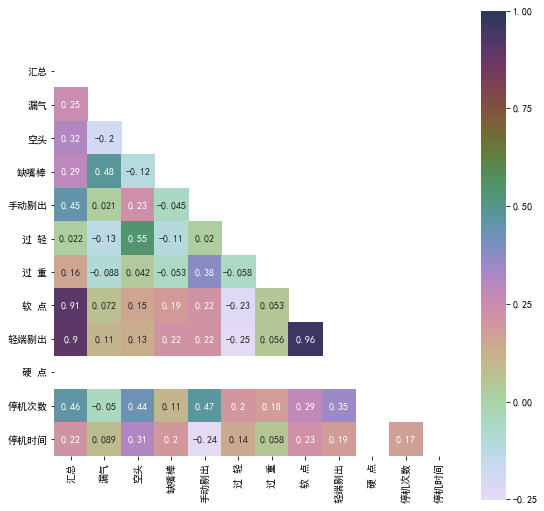

--------------------------------------------------
卷烟机02#
--------------------------------------------------
停机时间    1.000000
空头      0.745586
过 重     0.333422
硬 点     0.301344
Name: 停机时间, dtype: float64


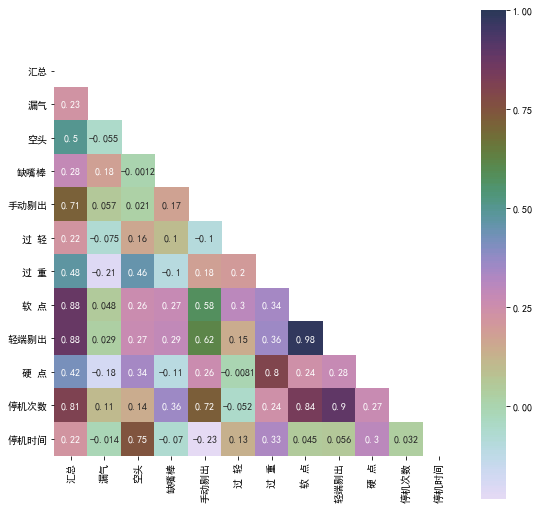

--------------------------------------------------
卷烟机04#
--------------------------------------------------
停机时间    1.000000
手动剔出    0.935037
空头      0.917562
汇总      0.872189
Name: 停机时间, dtype: float64


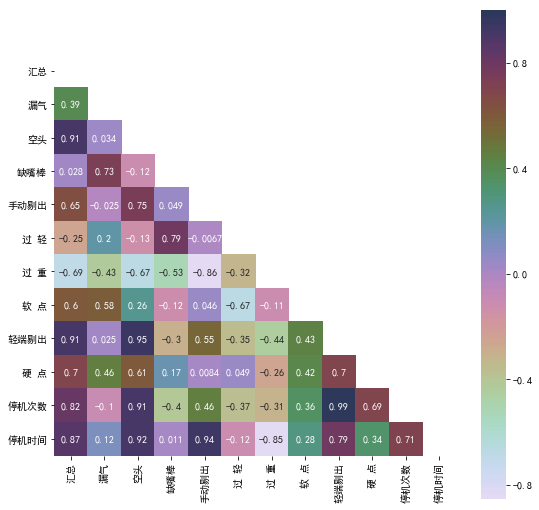

--------------------------------------------------
卷烟机05#
--------------------------------------------------
停机时间    1.000000
空头      0.262798
过 轻     0.217616
过 重     0.212483
Name: 停机时间, dtype: float64


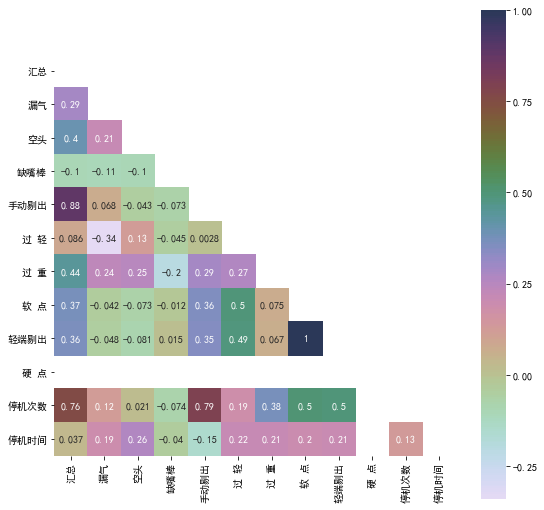

--------------------------------------------------
卷烟机06#
--------------------------------------------------
停机时间    1.000000
空头      0.547277
缺嘴棒     0.433334
汇总      0.405193
Name: 停机时间, dtype: float64


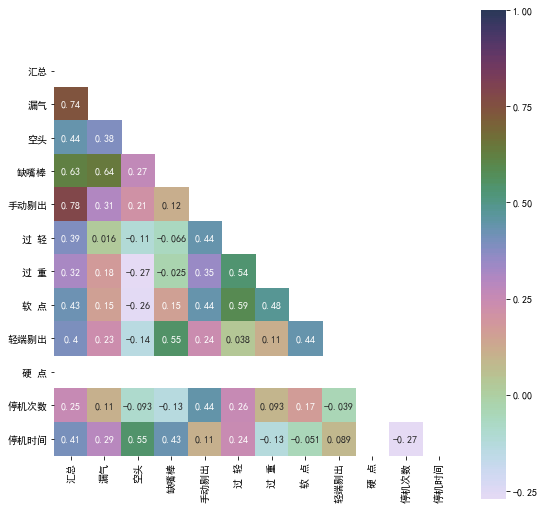

--------------------------------------------------
卷烟机07#
--------------------------------------------------
停机时间    1.000000
空头      0.450810
漏气      0.389891
汇总      0.273969
Name: 停机时间, dtype: float64


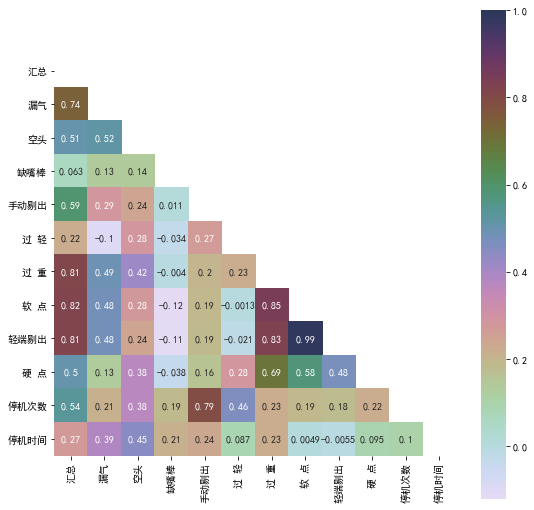

--------------------------------------------------
卷烟机11#
--------------------------------------------------
停机时间    1.000000
汇总      0.981332
过 重     0.962503
空头      0.927444
Name: 停机时间, dtype: float64


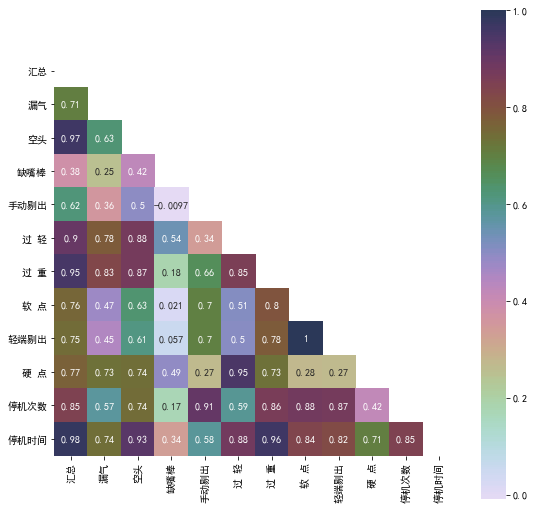

--------------------------------------------------
卷烟机12#
--------------------------------------------------
停机时间    1.000000
停机次数    0.477895
轻端剔出    0.415170
软 点     0.413180
Name: 停机时间, dtype: float64


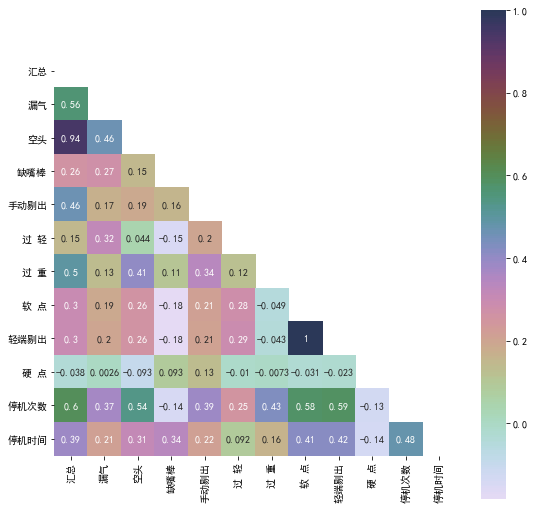

--------------------------------------------------
卷烟机13#
--------------------------------------------------
停机时间    1.000000
汇总      0.488433
过 重     0.470143
缺嘴棒     0.464603
Name: 停机时间, dtype: float64


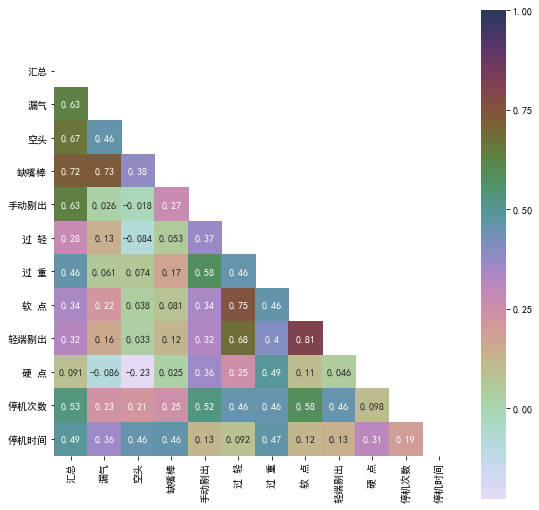

--------------------------------------------------
卷烟机14#
--------------------------------------------------
停机时间    1.000000
停机次数    0.656784
空头      0.395807
汇总      0.371980
Name: 停机时间, dtype: float64


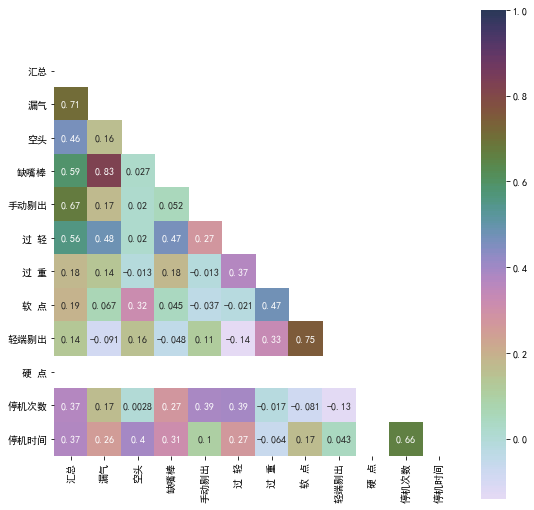

--------------------------------------------------
卷烟机15#
--------------------------------------------------
停机时间    1.000000
轻端剔出    0.492019
软 点     0.489289
空头      0.453882
Name: 停机时间, dtype: float64


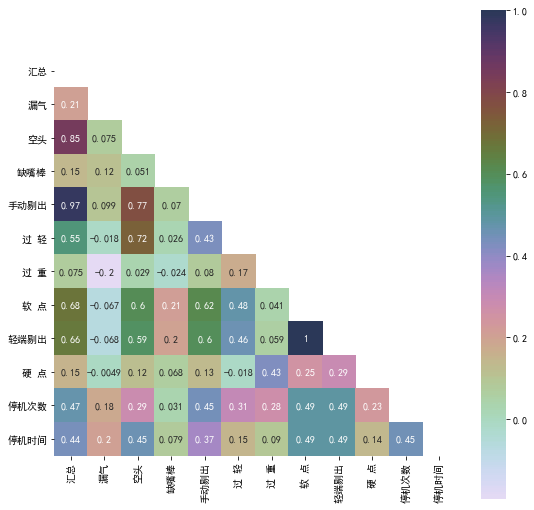

--------------------------------------------------
卷烟机16#
--------------------------------------------------
停机时间    1.000000
缺嘴棒     0.514319
停机次数    0.407025
汇总      0.397819
Name: 停机时间, dtype: float64


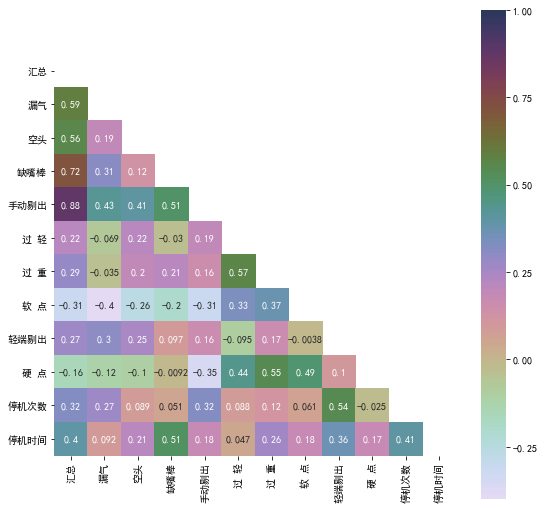

--------------------------------------------------
卷烟机17#
--------------------------------------------------
停机时间    1.000000
空头      0.116262
停机次数    0.098741
漏气      0.041488
Name: 停机时间, dtype: float64


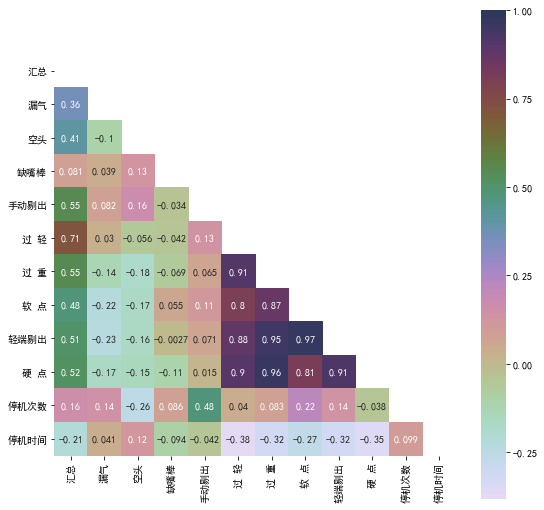

--------------------------------------------------
卷烟机18#
--------------------------------------------------
停机时间    1.000000
过 轻     0.294869
漏气      0.284713
过 重     0.281719
Name: 停机时间, dtype: float64


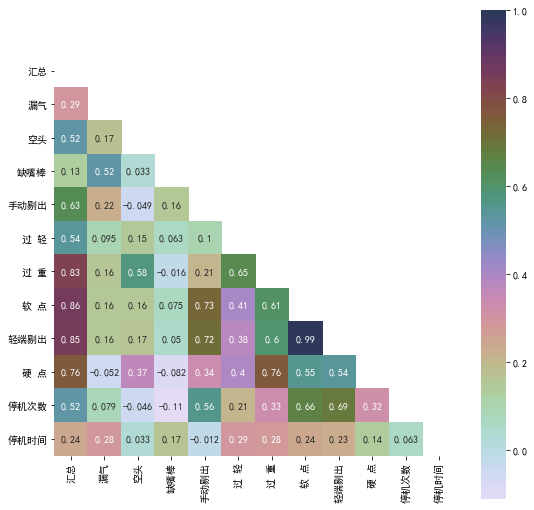

--------------------------------------------------
卷烟机19#
--------------------------------------------------
停机时间    1.000000
过 轻     0.635598
过 重     0.600592
硬 点     0.525472
Name: 停机时间, dtype: float64


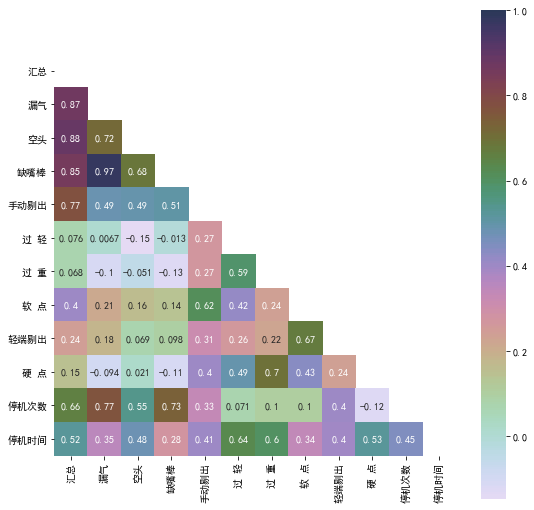

--------------------------------------------------
卷烟机20#
--------------------------------------------------
停机时间    1.000000
过 重     0.851799
空头      0.788445
硬 点     0.708522
Name: 停机时间, dtype: float64


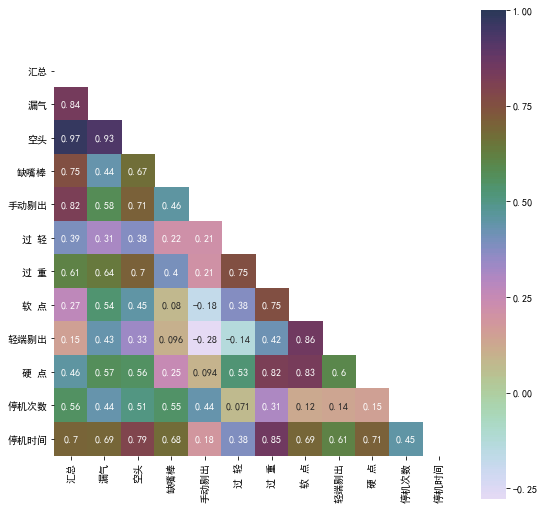

--------------------------------------------------
卷烟机21#
--------------------------------------------------
停机时间    1.000000
停机次数    0.708134
手动剔出    0.633411
汇总      0.627815
Name: 停机时间, dtype: float64


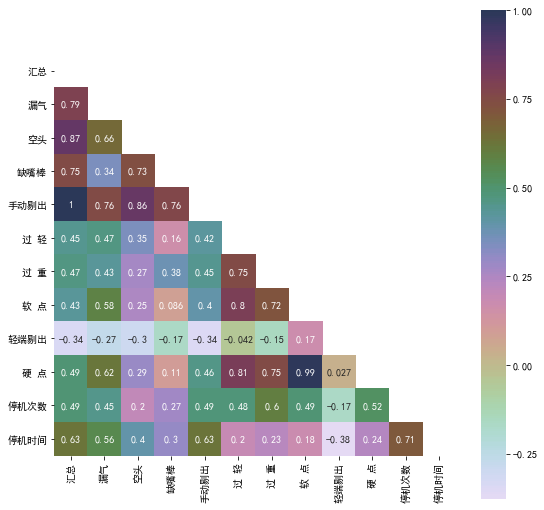

--------------------------------------------------
卷烟机22#
--------------------------------------------------
停机时间    1.000000
硬 点     0.759054
空头      0.675653
手动剔出    0.184609
Name: 停机时间, dtype: float64


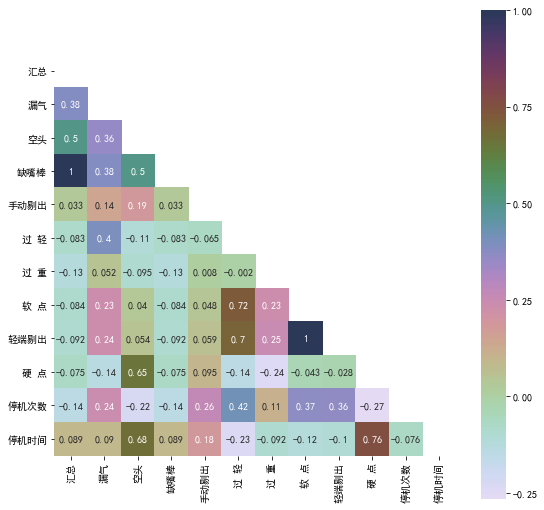

Wall time: 5.34 s


In [13]:
%%time

topsjlist = []
for i in range(1,23):
    if i not in [3,10,8,9]:
        dttc = dantai(df1,'机台','卷烟机'+str('%02d'%i)+'#')
        dttj = dantai(df2,'机台名称','卷烟机'+str('%02d'%i)+'#')
        tjcs = dttj['生产日期'].value_counts().sort_index()
        tjsj = dttj.groupby('生产日期').sum().values
        dttj = pd.DataFrame(tjcs)
        dttj = dttj.reset_index().rename(columns={'index':'生产日期','生产日期':'停机次数'})
        dttj['停机时间'] = tjsj
        df = pd.merge(dttc,dttj,on='生产日期',how='inner')
        
        topsj = df.corr()['停机时间'].sort_values(ascending=False)[:4]
        topsjlist.append(list(topsj.index))
        
        print('-'*50)
        print('卷烟机'+str('%02d'%i)+'#')
        print('-'*50)
        print(topsj)
        plt.figure(figsize=(9, 9))
        cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
        mask = np.zeros_like(df.corr())
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(df.corr(),cmap=cmap,annot=True,square=True,mask=mask)
        plt.show()

--------------------------------------------------
卷烟机01#
--------------------------------------------------
停机次数    1.000000
手动剔出    0.473659
汇总      0.461462
空头      0.437317
Name: 停机次数, dtype: float64


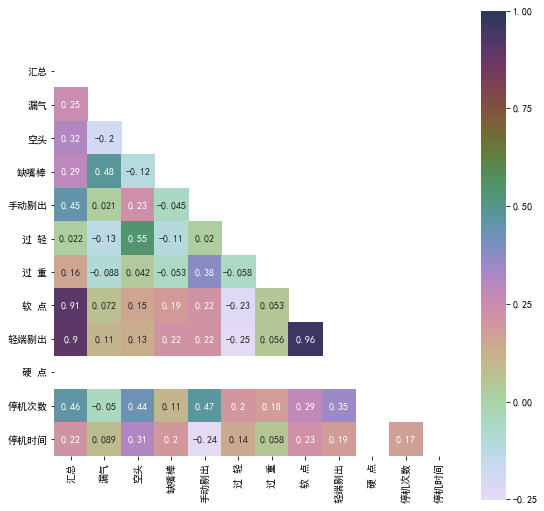

--------------------------------------------------
卷烟机02#
--------------------------------------------------
停机次数    1.000000
轻端剔出    0.896077
软 点     0.840065
汇总      0.809906
Name: 停机次数, dtype: float64


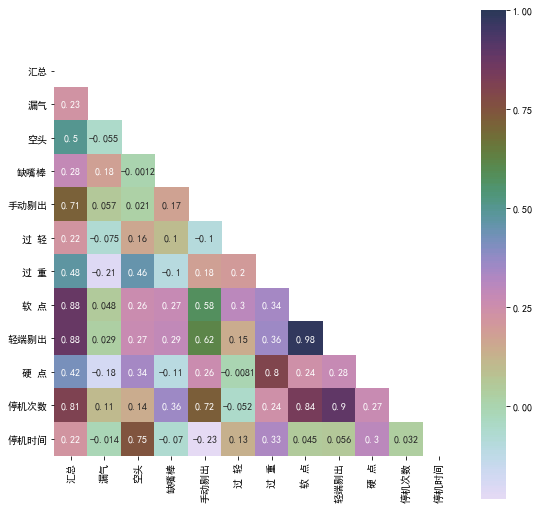

--------------------------------------------------
卷烟机04#
--------------------------------------------------
停机次数    1.000000
轻端剔出    0.985882
空头      0.911407
汇总      0.824847
Name: 停机次数, dtype: float64


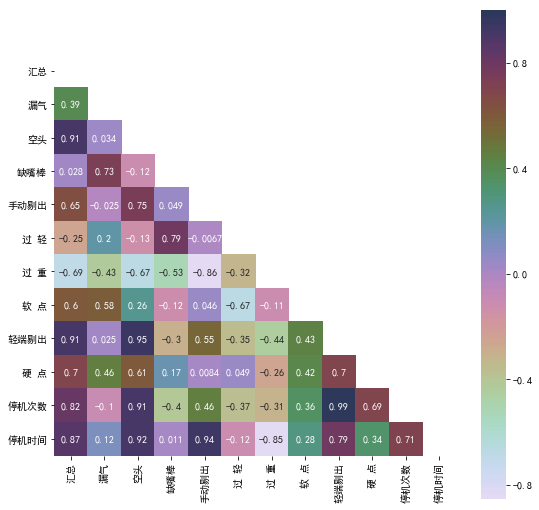

--------------------------------------------------
卷烟机05#
--------------------------------------------------
停机次数    1.000000
手动剔出    0.792574
汇总      0.760900
软 点     0.502787
Name: 停机次数, dtype: float64


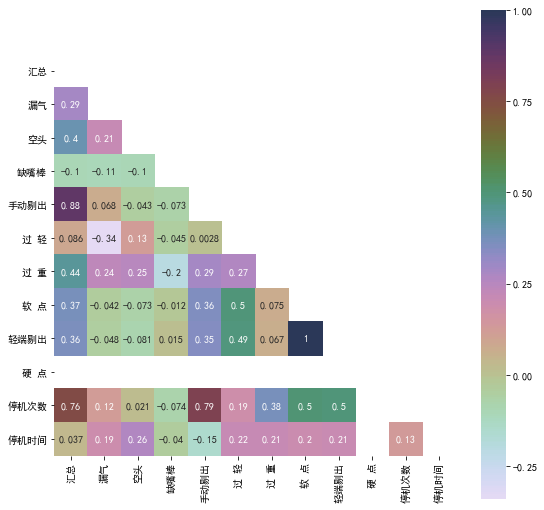

--------------------------------------------------
卷烟机06#
--------------------------------------------------
停机次数    1.000000
手动剔出    0.443841
过 轻     0.257363
汇总      0.252086
Name: 停机次数, dtype: float64


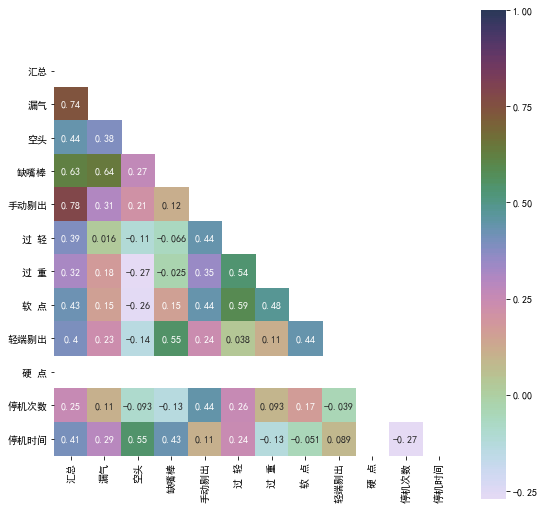

--------------------------------------------------
卷烟机07#
--------------------------------------------------
停机次数    1.000000
手动剔出    0.790794
汇总      0.536029
过 轻     0.461037
Name: 停机次数, dtype: float64


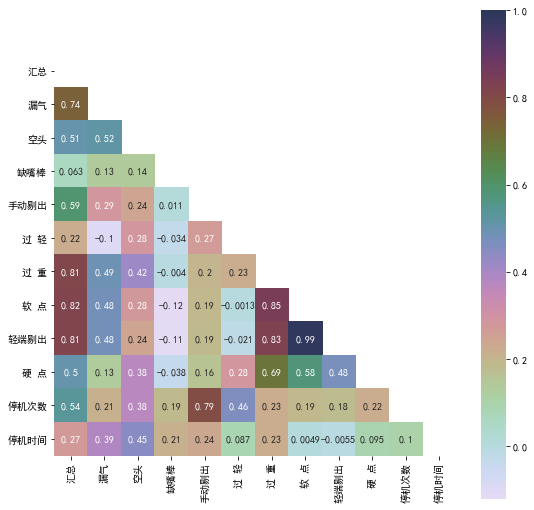

--------------------------------------------------
卷烟机11#
--------------------------------------------------
停机次数    1.000000
手动剔出    0.906853
软 点     0.879743
轻端剔出    0.873282
Name: 停机次数, dtype: float64


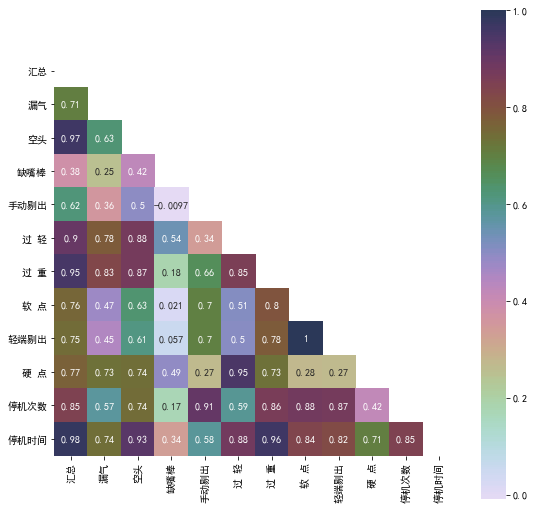

--------------------------------------------------
卷烟机12#
--------------------------------------------------
停机次数    1.000000
汇总      0.602761
轻端剔出    0.585571
软 点     0.582160
Name: 停机次数, dtype: float64


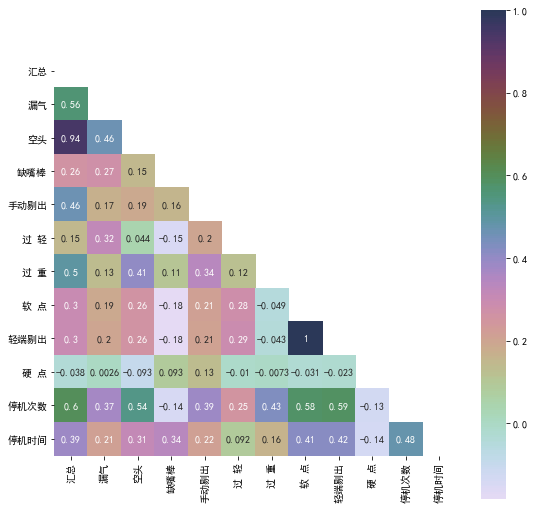

--------------------------------------------------
卷烟机13#
--------------------------------------------------
停机次数    1.000000
软 点     0.584445
汇总      0.530408
手动剔出    0.520714
Name: 停机次数, dtype: float64


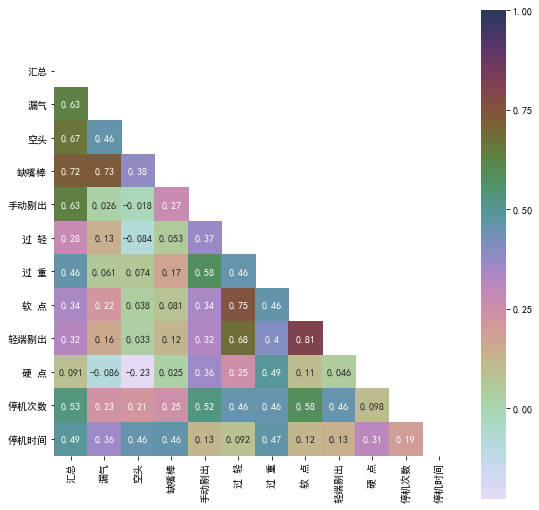

--------------------------------------------------
卷烟机14#
--------------------------------------------------
停机次数    1.000000
停机时间    0.656784
过 轻     0.390698
手动剔出    0.387288
Name: 停机次数, dtype: float64


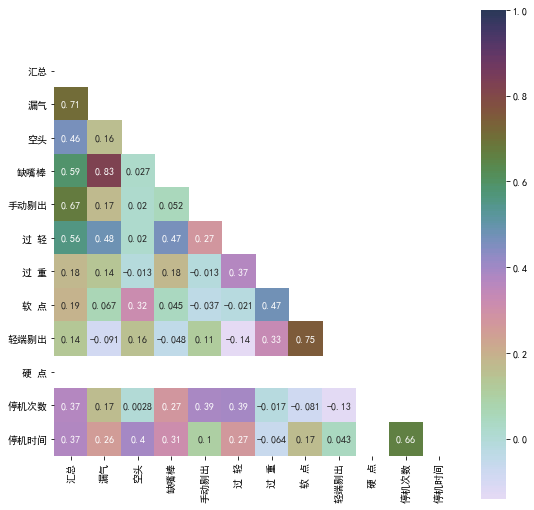

--------------------------------------------------
卷烟机15#
--------------------------------------------------
停机次数    1.000000
软 点     0.490168
轻端剔出    0.490030
汇总      0.473477
Name: 停机次数, dtype: float64


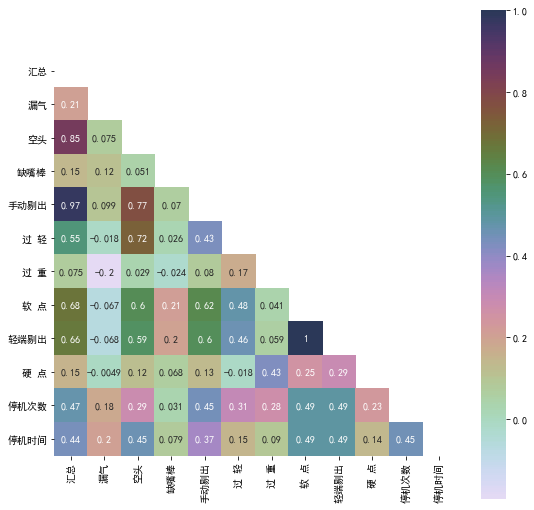

--------------------------------------------------
卷烟机16#
--------------------------------------------------
停机次数    1.000000
轻端剔出    0.543718
停机时间    0.407025
汇总      0.318596
Name: 停机次数, dtype: float64


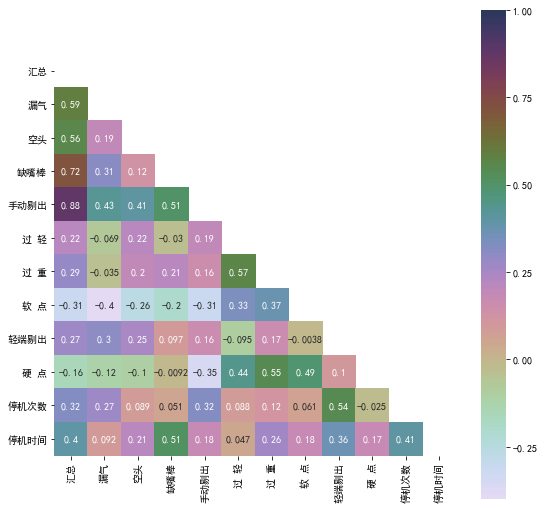

--------------------------------------------------
卷烟机17#
--------------------------------------------------
停机次数    1.000000
手动剔出    0.477838
软 点     0.218379
汇总      0.158953
Name: 停机次数, dtype: float64


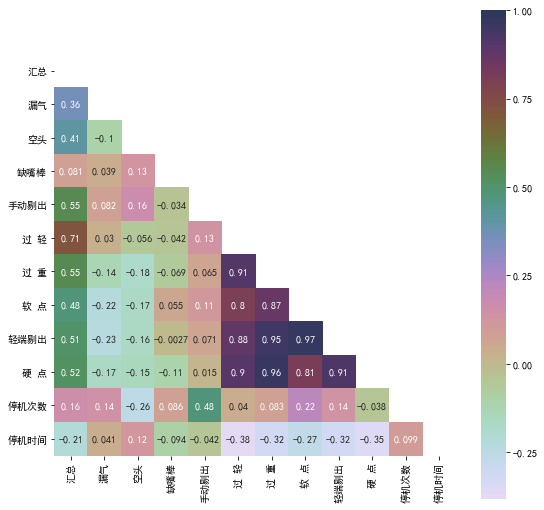

--------------------------------------------------
卷烟机18#
--------------------------------------------------
停机次数    1.000000
轻端剔出    0.685307
软 点     0.661524
手动剔出    0.558726
Name: 停机次数, dtype: float64


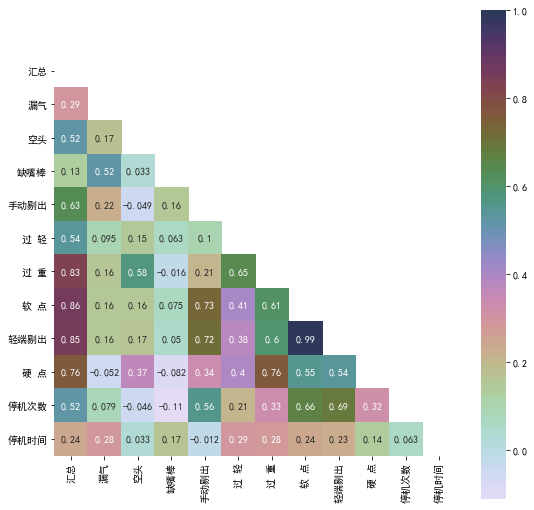

--------------------------------------------------
卷烟机19#
--------------------------------------------------
停机次数    1.000000
漏气      0.765412
缺嘴棒     0.734678
汇总      0.658719
Name: 停机次数, dtype: float64


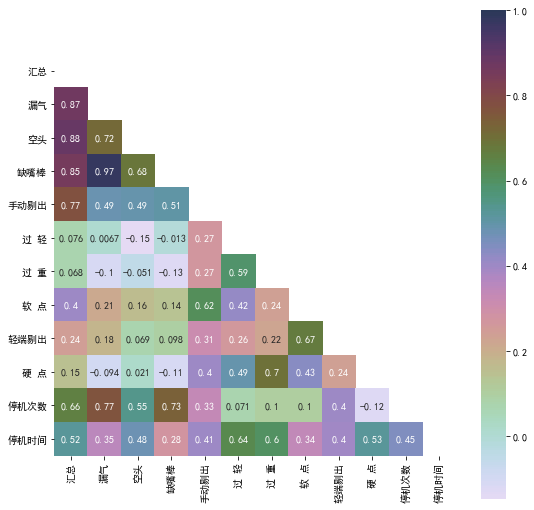

--------------------------------------------------
卷烟机20#
--------------------------------------------------
停机次数    1.000000
汇总      0.557485
缺嘴棒     0.550006
空头      0.508036
Name: 停机次数, dtype: float64


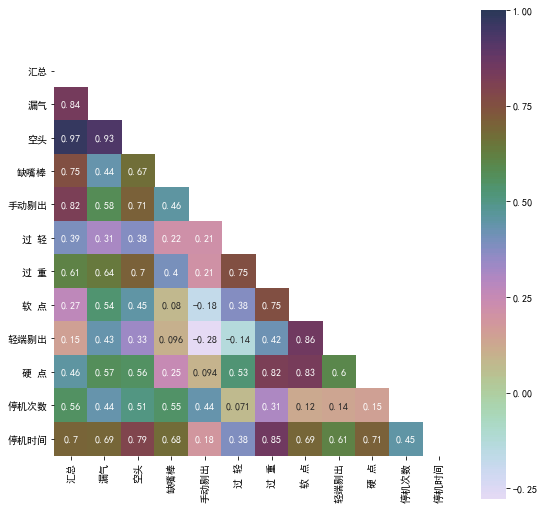

--------------------------------------------------
卷烟机21#
--------------------------------------------------
停机次数    1.000000
停机时间    0.708134
过 重     0.598904
硬 点     0.524153
Name: 停机次数, dtype: float64


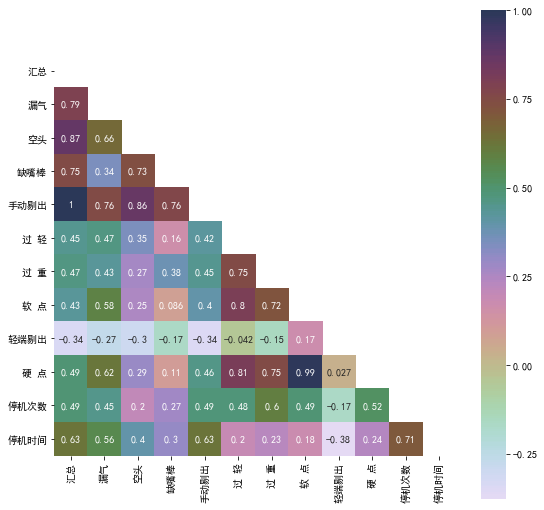

--------------------------------------------------
卷烟机22#
--------------------------------------------------
停机次数    1.000000
过 轻     0.418191
软 点     0.370840
轻端剔出    0.362598
Name: 停机次数, dtype: float64


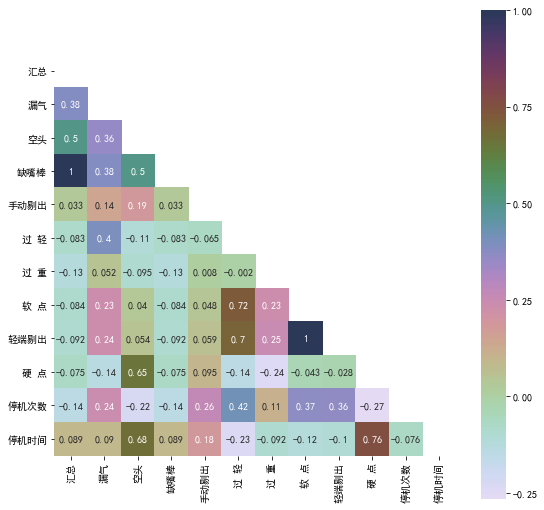

Wall time: 5.36 s


In [14]:
%%time
topcslist = []
for i in range(1,23):
    if i not in [3,10,8,9]:
        dttc = dantai(df1,'机台','卷烟机'+str('%02d'%i)+'#')
        dttj = dantai(df2,'机台名称','卷烟机'+str('%02d'%i)+'#')
        tjcs = dttj['生产日期'].value_counts().sort_index()
        tjsj = dttj.groupby('生产日期').sum().values
        dttj = pd.DataFrame(tjcs)
        dttj = dttj.reset_index().rename(columns={'index':'生产日期','生产日期':'停机次数'})
        dttj['停机时间'] = tjsj
        df = pd.merge(dttc,dttj,on='生产日期',how='inner')
        
        topcs = df.corr()['停机次数'].sort_values(ascending=False)[:4]
        topcslist.append(list(topcs.index))
        
        print('-'*50)
        print('卷烟机'+str('%02d'%i)+'#')
        print('-'*50)
        print(topcs)
        plt.figure(figsize=(9, 9))
        cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
        mask = np.zeros_like(df.corr())
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(df.corr(),cmap=cmap,annot=True,square=True,mask=mask)
        plt.show()

### 相关性排名前三的指标在所有机台出现的次数统计

In [15]:
from collections import Counter

print(Counter(np.array(topsjlist).ravel()).most_common(5))

print(Counter(np.array(topcslist).ravel()).most_common(5))

[('停机时间', 18), ('空头', 12), ('汇总', 9), ('过 重', 7), ('停机次数', 5)]
[('停机次数', 18), ('汇总', 13), ('手动剔出', 9), ('软 点', 9), ('轻端剔出', 8)]
